In [1]:
# I decided to treat this as a classification problem by creating a new binary variable affair
# (did the woman have at least one affair?) and trying to predict the classification for each
# woman.

In [2]:
# Dataset
    # The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
    # from a survey of women in 1974 by Redbook magazine, in which married women were
    # asked about their participation in extramarital affairs. More information about the study
    # is available in a 1978 paper from the Journal of Political Economy.

In [3]:
# Description of Variables:
# The dataset contains 6366 observations of 9 variables:
    # rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
    # age: woman's age
    # yrs_married: number of years married
    # children: number of children
    # religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
    # educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 =
    # college graduate, 17 = some graduate school, 20 = advanced degree)
    # occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 =
    # "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
    # professional with advanced degree)
    # occupation_husb: husband's occupation (same coding as above)
    # affairs: time spent in extra-marital affairs

In [4]:
# Code to loading data and modules
    # import numpy as np
    # import pandas as pd
    # import statsmodels.api as sm
    # import matplotlib.pyplot as plt
    # from patsy import dmatrices
    # from sklearn.linear_model import LogisticRegression
    # from sklearn.cross_validation import train_test_split
    # from sklearn import metrics
    # from sklearn.cross_validation import cross_val_score
    # dta = sm.datasets.fair.load_pandas().data
    # # add "affair" column: 1 represents having affairs, 0 represents not
    # dta['affair'] = (dta.affairs > 0).astype(int)
    # Y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
    # religious + educ + C(occupation) + C(occupation_husb)',
    # dta, return_type="dataframe")
    # X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
    # 'C(occupation)[T.3.0]':'occ_3',
    # 'C(occupation)[T.4.0]':'occ_4',
    # 'C(occupation)[T.5.0]':'occ_5',
    # 'C(occupation)[T.6.0]':'occ_6',
    # 'C(occupation_husb)[T.2.0]':'occ_husb_2',
    # 'C(occupation_husb)[T.3.0]':'occ_husb_3',
    # 'C(occupation_husb)[T.4.0]':'occ_husb_4',
    # 'C(occupation_husb)[T.5.0]':'occ_husb_5',
    # 'C(occupation_husb)[T.6.0]':'occ_husb_6'})
    # Y = np.ravel(y)

# Loading Libraries and Data

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from patsy import dmatrices


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics

dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
Y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


C:\Users\Praveen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Understanding the dataset and data

## About dta

In [6]:
type(dta)

pandas.core.frame.DataFrame

In [7]:
print(dta.shape)

(6366, 10)


In [8]:
print(dta.columns)

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')


In [9]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


## About X dataframe - Input Vector

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X.shape

(6366, 17)

In [12]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [13]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


## About Y - Output

In [14]:
type(Y)

pandas.core.frame.DataFrame

In [15]:
Y.shape

(6366, 1)

In [16]:
Y.columns

Index(['affair'], dtype='object')

In [17]:
Y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Data Wrangling


Creating a new dataframe from X and Y to makes sure rows are removed from X and Y are the same if some rows are required to be removed when wrangling the data or some transformation or removing outliers etc.

In [18]:
affairs_data = X
affairs_data["affair"]=Y

In [19]:
affairs_data.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [20]:
affairs_data.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ', 'affair'],
      dtype='object')

In [21]:
affairs_data.shape

(6366, 18)

In [22]:
affairs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 18 columns):
Intercept        6366 non-null float64
occ_2            6366 non-null float64
occ_3            6366 non-null float64
occ_4            6366 non-null float64
occ_5            6366 non-null float64
occ_6            6366 non-null float64
occ_husb_2       6366 non-null float64
occ_husb_3       6366 non-null float64
occ_husb_4       6366 non-null float64
occ_husb_5       6366 non-null float64
occ_husb_6       6366 non-null float64
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
affair           6366 non-null float64
dtypes: float64(18)
memory usage: 945.0 KB


 This is already a cleaned dataset, no need to do anything

# Basic Statistical Information

In [23]:
# All the columns are NUMERICAL. There is no categorical data to consider
print(affairs_data.describe())

       Intercept        occ_2        occ_3        occ_4        occ_5  \
count     6366.0  6366.000000  6366.000000  6366.000000  6366.000000   
mean         1.0     0.134936     0.437166     0.288093     0.116243   
std          0.0     0.341682     0.496075     0.452910     0.320541   
min          1.0     0.000000     0.000000     0.000000     0.000000   
25%          1.0     0.000000     0.000000     0.000000     0.000000   
50%          1.0     0.000000     0.000000     0.000000     0.000000   
75%          1.0     0.000000     1.000000     1.000000     0.000000   
max          1.0     1.000000     1.000000     1.000000     1.000000   

             occ_6   occ_husb_2   occ_husb_3   occ_husb_4   occ_husb_5  \
count  6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean      0.017122     0.205467     0.076971     0.318882     0.279453   
std       0.129737     0.404074     0.266567     0.466080     0.448766   
min       0.000000     0.000000     0.000000     0.0000

In [24]:
# Measuring the correlation of different columns with each other and the target variable
affairs_data.corr()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ_2,NaN,1.000000,-0.348075,-0.251243,-0.143237,-0.052128,0.183782,-0.020904,-0.009786,-0.093292,-0.059107,-0.019697,-0.034223,0.004668,0.081182,-0.013129,-0.217719,-0.024613
occ_3,NaN,-0.348075,1.000000,-0.560645,-0.319631,-0.116322,-0.000638,0.090043,0.011248,0.003021,-0.101673,-0.053082,-0.066371,-0.021261,-0.063298,-0.034986,-0.335615,0.045729
occ_4,NaN,-0.251243,-0.560645,1.000000,-0.230712,-0.083962,-0.083123,-0.043159,0.037341,-0.001946,0.085766,0.068882,0.040982,-0.026816,-0.003235,0.043996,0.477505,-0.082706
occ_5,NaN,-0.143237,-0.319631,-0.230712,1.000000,-0.047868,-0.053426,-0.044053,-0.039932,0.114903,0.006016,-0.002109,0.079533,0.076820,0.033274,0.004260,-0.022121,0.073766
occ_6,NaN,-0.052128,-0.116322,-0.083962,-0.047868,1.000000,-0.046140,-0.029028,-0.043541,-0.030926,0.218824,0.008878,0.030676,-0.004912,-0.026830,0.011784,0.226920,0.012559
occ_husb_2,NaN,0.183782,-0.000638,-0.083123,-0.053426,-0.046140,1.000000,-0.146849,-0.347951,-0.316693,-0.153248,-0.038992,-0.057368,-0.033451,0.001190,0.009990,-0.160756,0.003474
occ_husb_3,NaN,-0.020904,0.090043,-0.043159,-0.044053,-0.029028,-0.146849,1.000000,-0.197588,-0.179838,-0.087024,-0.022514,0.011610,0.008046,-0.005538,0.008170,-0.052723,0.018884
occ_husb_4,NaN,-0.009786,0.011248,0.037341,-0.039932,-0.043541,-0.347951,-0.197588,1.000000,-0.426115,-0.206198,0.003303,-0.048989,-0.031121,-0.008032,-0.008491,-0.031422,-0.011295
occ_husb_5,NaN,-0.093292,0.003021,-0.001946,0.114903,-0.030926,-0.316693,-0.179838,-0.426115,1.000000,-0.187674,0.003256,0.105525,0.092462,0.053965,-0.000063,0.042540,0.021181


# Visual Analysis OR Exploratory Analysis of the data 

## Understanding the frequency distribution of the data

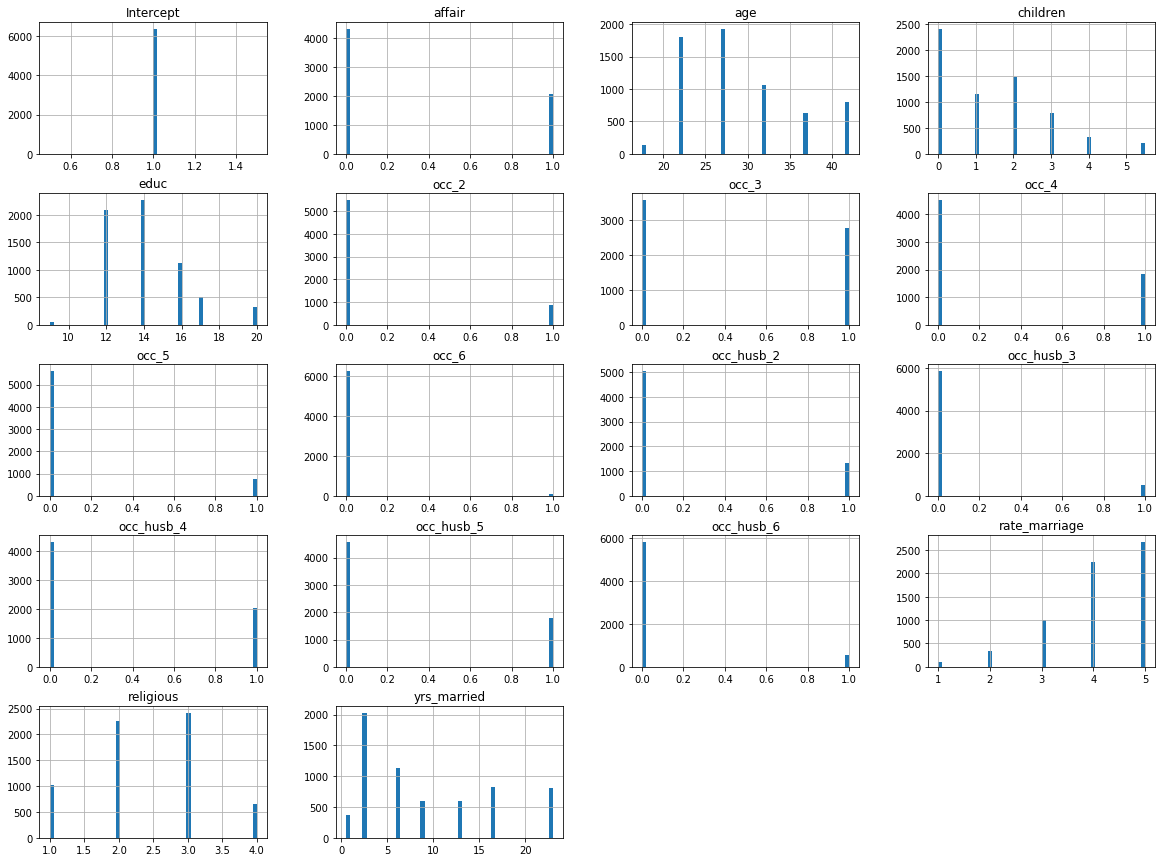

In [25]:
# Plotting the histogram of the data to understand the frequency distribution of the data
affairs_data.hist(bins=50,figsize=(20,15))
plt.show()

## Understanding the correlation between variables by using Heatmap

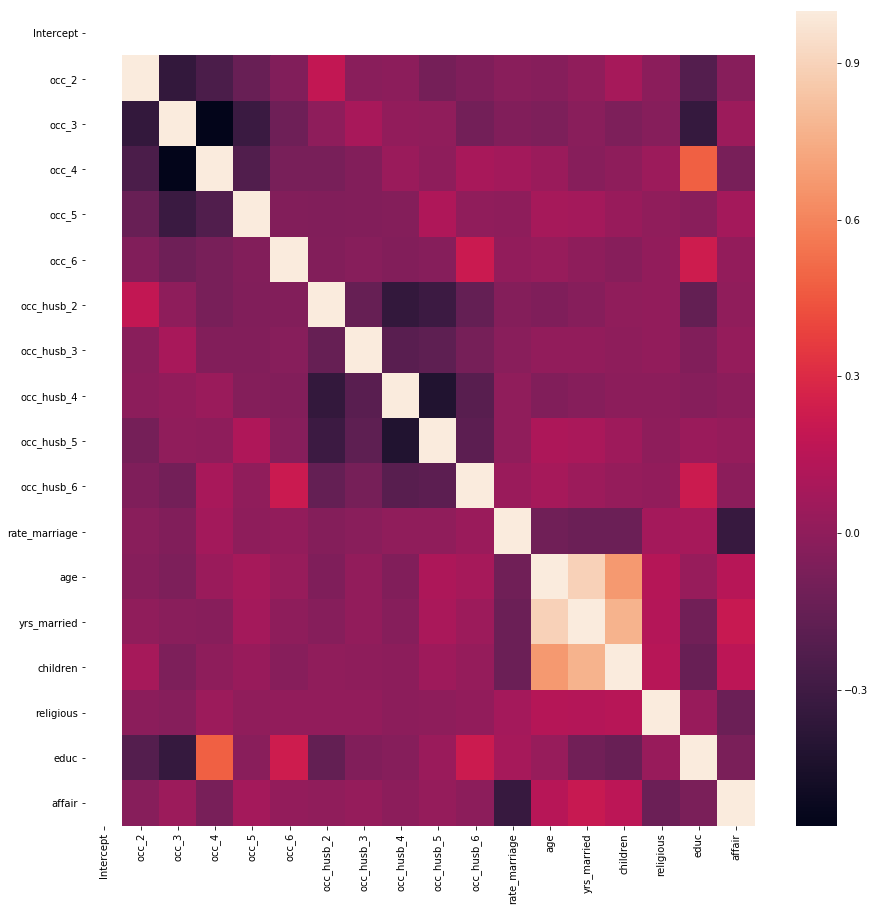

In [26]:
# Check for correlations using HEATMAP
plt.figure(figsize=(15,15))
sns.heatmap(affairs_data.corr())

# Fitting Model - Logistic Regression model (Classifier model)

In [27]:
# Separating Independent variable from Dependent variable from affair_data dataframe  
X = affairs_data.drop("affair",axis =1)
Y = affairs_data["affair"]

In [28]:
# Instantiate a logistic regression model, and fit with X and y
lr = LogisticRegression()

model = lr.fit(X, Y)

# check the accuracy on the data
model.score(X, Y)

0.7258875274897895

In [29]:
# what percentage had affairs?
Y.mean()

0.3224945020420987

32% of the women in the dataset had affairs

In [30]:
# Predicted values by the model
Y_pred = model.predict(X)

In [31]:
# Predicted probabilities by the model
probs = model.predict_proba(X)

In [32]:
# examine the coefficients
X.columns, model.coef_

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.48983606,  0.1880664 ,  0.49894812,  0.25066814,  0.839008  ,
          0.83390825,  0.19063622,  0.2978329 ,  0.16140914,  0.18777109,
          0.19401647, -0.70311973, -0.05841813,  0.10567669,  0.01691983,
         -0.37113512,  0.00401584]]))

# Train and Test Split

In [33]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state =100)

## Checking if the distribution of target variable in the dataset, train set, and test set are similar

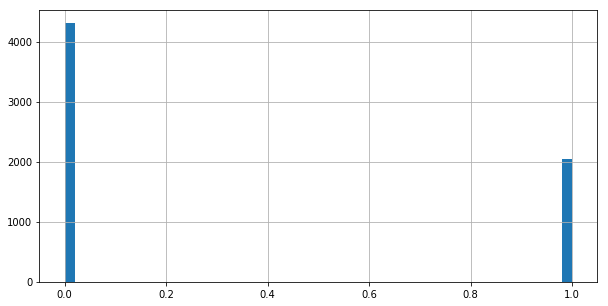

In [34]:
Y.hist(bins=50,figsize=(10,5))
plt.show()

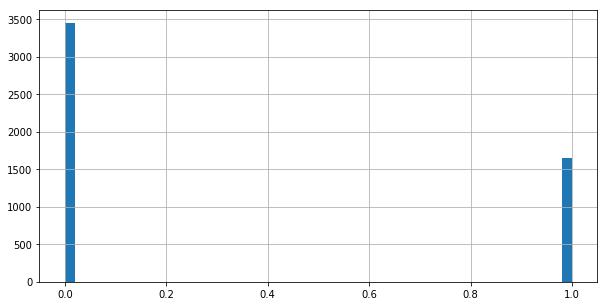

In [35]:
y_train.hist(bins=50,figsize=(10,5))
plt.show()

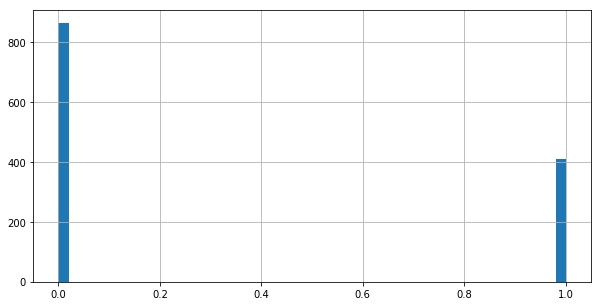

In [36]:
y_test.hist(bins=50,figsize=(10,5))
plt.show()

# Model Evaluation by using Validation Set(Test Set)

In [37]:
# Instantiate a logistic regression model, and fit with X and y
lr_split = LogisticRegression()
model_split = lr_split.fit(x_train, y_train)

# Check the accuracy on the train data
model_split.score(x_train, y_train)

0.7260408483896308

In [38]:
# Prediction for Train and Test Dataset
y_train_pred = model_split.predict(x_train)
y_test_pred = model_split.predict(x_test)

In [39]:
# Generate class probabilities
probs_train = model_split.predict_proba(x_train)
probs_train

array([[0.83195551, 0.16804449],
       [0.44205531, 0.55794469],
       [0.5307897 , 0.4692103 ],
       ...,
       [0.89149799, 0.10850201],
       [0.78825804, 0.21174196],
       [0.46094228, 0.53905772]])

In [40]:
probs_test = model_split.predict_proba(x_test)
probs_test

array([[0.92085352, 0.07914648],
       [0.79740686, 0.20259314],
       [0.70803717, 0.29196283],
       ...,
       [0.30757369, 0.69242631],
       [0.57305696, 0.42694304],
       [0.62689065, 0.37310935]])

# Model performance metrics

In [41]:
# Generate model evaluation metrics for the dataset
print("Performance metrics of the model for the Whole Dataset")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(Y, Y_pred))
print("Precision Score: ",metrics.precision_score(Y, Y_pred))
print("Recall Score: ",metrics.recall_score(Y, Y_pred))
print("AUROC Score: ",metrics.roc_auc_score(Y,  probs[:, 1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(Y, Y_pred))
print()
print("Classification Report: ",metrics.classification_report(Y, Y_pred))

Performance metrics of the model for the Whole Dataset
----------------------------------------------------------------------------------------------------
Accuracy:  0.7258875274897895
Precision Score:  0.6336805555555556
Recall Score:  0.3555772040915733
AUROC Score:  0.7473526439228291

Confusion Matrix:  
  [[3891  422]
 [1323  730]]

Classification Report:               precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      4313
        1.0       0.63      0.36      0.46      2053

avg / total       0.71      0.73      0.70      6366



In [42]:
# Generate model evaluation metrics for Train Data
print("Performance metrics of the model for Train Data")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision Score: ",metrics.precision_score(y_train, y_train_pred))
print("Recall Score: ",metrics.recall_score(y_train, y_train_pred))
print("AUROC Score: ",metrics.roc_auc_score(y_train, probs_train[:, 1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_train, y_train_pred))
print()
print("Classification Report: ",metrics.classification_report(y_train, y_train_pred))

Performance metrics of the model for Train Data
----------------------------------------------------------------------------------------------------
Accuracy:  0.7260408483896308
Precision Score:  0.6319148936170212
Recall Score:  0.36153377967133293
AUROC Score:  0.7476060611568589

Confusion Matrix:  
  [[3103  346]
 [1049  594]]

Classification Report:               precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      3449
        1.0       0.63      0.36      0.46      1643

avg / total       0.71      0.73      0.70      5092



In [43]:
# Generate model evaluation metrics for Test Data
print("Performance metrics of the model for Test Data")
print("-"*100)
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision Score: ",metrics.precision_score(y_test, y_test_pred))
print("Recall Score: ",metrics.recall_score(y_test, y_test_pred))
print("AUROC Score: ",metrics.roc_auc_score(y_test, probs_test[:, 1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
print()
print("Classification Report: ",metrics.classification_report(y_test, y_test_pred))

Performance metrics of the model for Test Data
----------------------------------------------------------------------------------------------------
Accuracy:  0.7221350078492935
Precision Score:  0.6320754716981132
Recall Score:  0.32682926829268294
AUROC Score:  0.7448382452574526

Confusion Matrix:  
  [[786  78]
 [276 134]]

Classification Report:               precision    recall  f1-score   support

        0.0       0.74      0.91      0.82       864
        1.0       0.63      0.33      0.43       410

avg / total       0.71      0.72      0.69      1274



In [44]:
# Examine the coefficients
X.columns, np.transpose(model_split.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.35266214],
        [ 0.1655592 ],
        [ 0.50067465],
        [ 0.21326755],
        [ 0.80038937],
        [ 0.72565094],
        [ 0.25690772],
        [ 0.33134477],
        [ 0.28208262],
        [ 0.27315884],
        [ 0.25886785],
        [-0.71865302],
        [-0.05854108],
        [ 0.10066664],
        [ 0.03194604],
        [-0.36251335],
        [ 0.02364296]]))

# Model Evaluation Using Cross-Validation

Trying 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [45]:
# Evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
scores, scores.mean(), scores.var()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876,
 0.00032638921411669265)

In [46]:
print(metrics.accuracy_score(Y, Y_pred))

0.7258875274897895


The accuracy score of the model is close to accuracy of the 10-fold CV score's mean.
This means that the model is robust for the dataset


In [47]:
# Evaluate the model using 10-fold cross-validation for train data
scores = cross_val_score(LogisticRegression(), x_train, y_train, scoring='accuracy', cv=10)
scores, scores.mean(), scores.var()

(array([0.71176471, 0.71960784, 0.71960784, 0.74656189, 0.74263261,
        0.69941061, 0.74263261, 0.7151277 , 0.72888016, 0.70472441]),
 0.7230950381173462,
 0.00024622023358885834)

# Predicting the Probability of an Affair - For a new datapoint

Just for fun, let's predict the probability of an affair for a random woman not present in the dataset. She's a 25-year-old teacher who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [48]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]]))

array([[0.7747227, 0.2252773]])

The predicted probability of an affair is 22.5%.